In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
print("\nMissing values before cleaning:")
print(titanic.isnull().sum())
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
print("\nMissing values after cleaning:")
print(titanic.isnull().sum())
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print("\nData after cleaning:")
print(titanic.head())


Missing values before cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data after cleaning:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


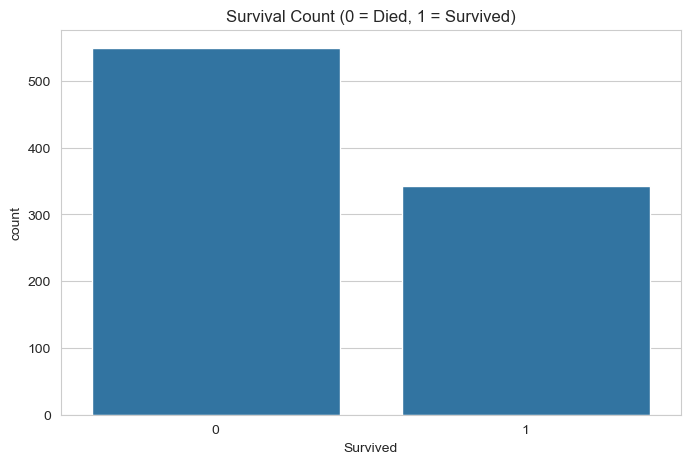


Overall survival rate: 38.38%


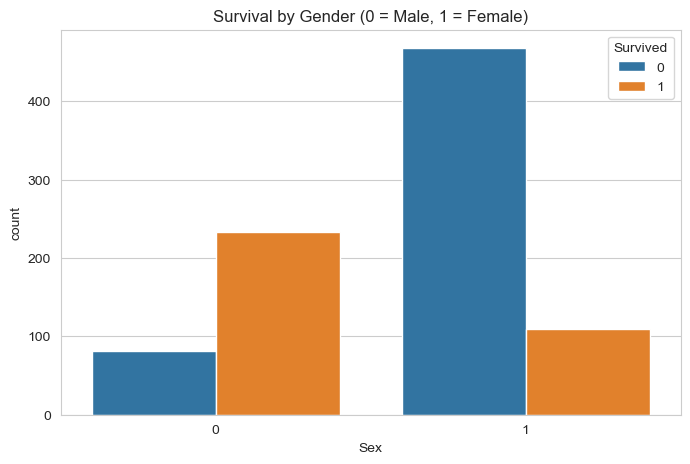

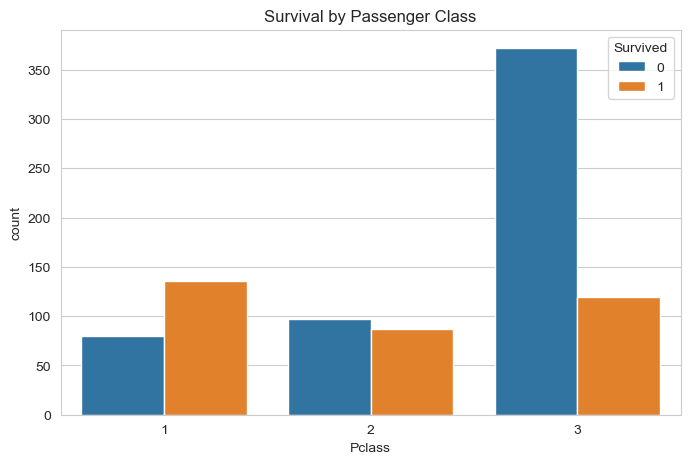

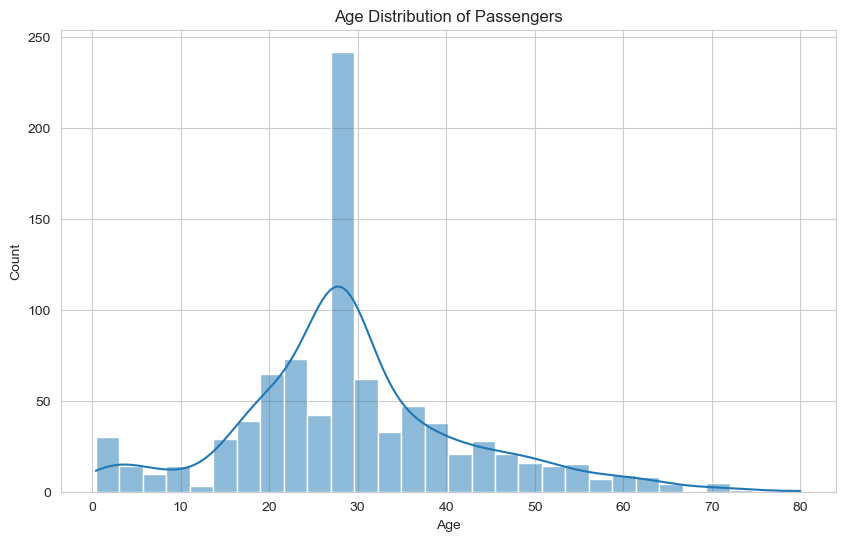

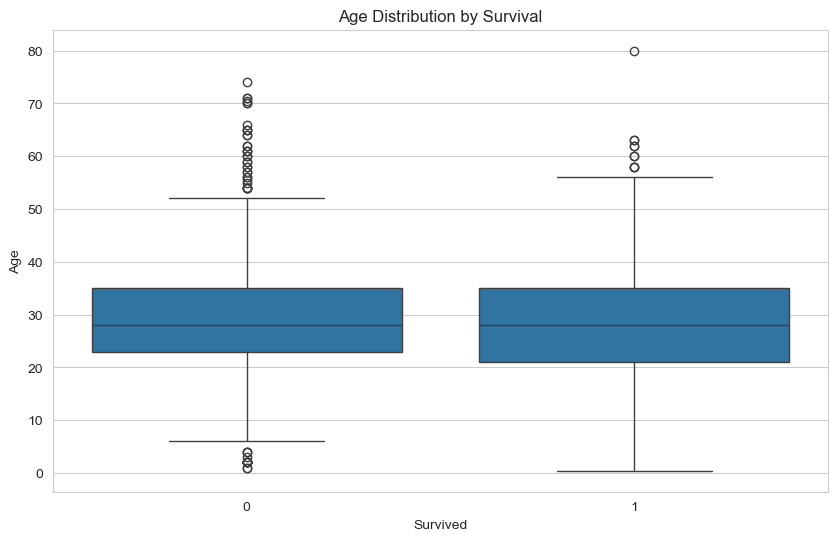

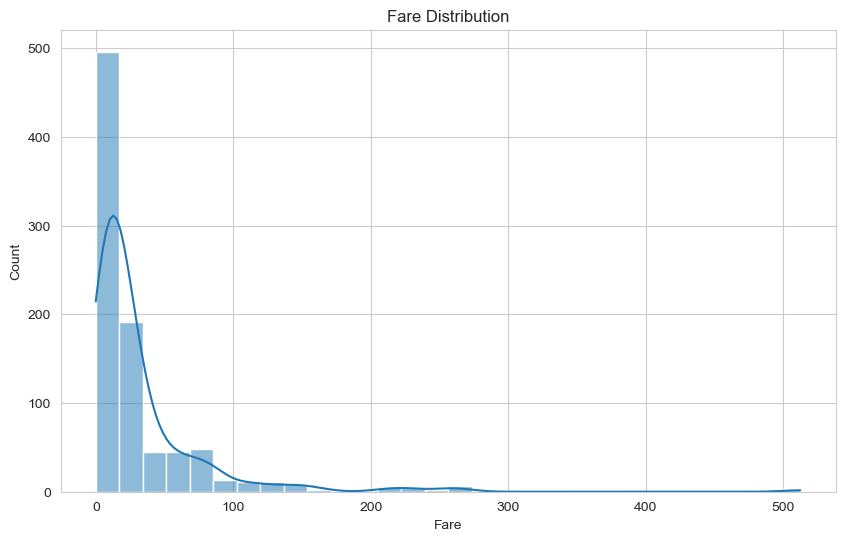

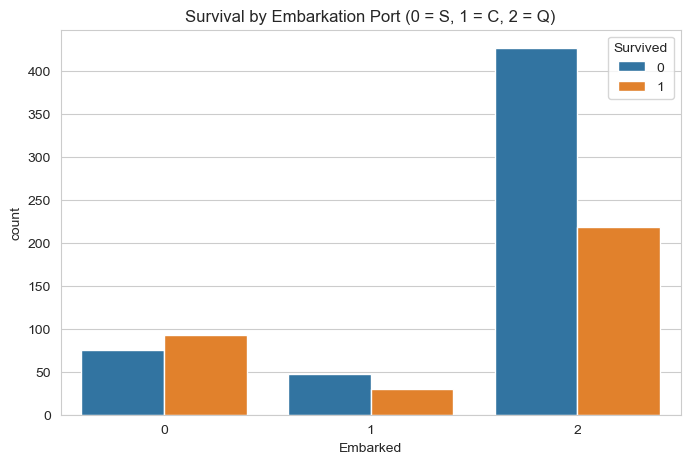

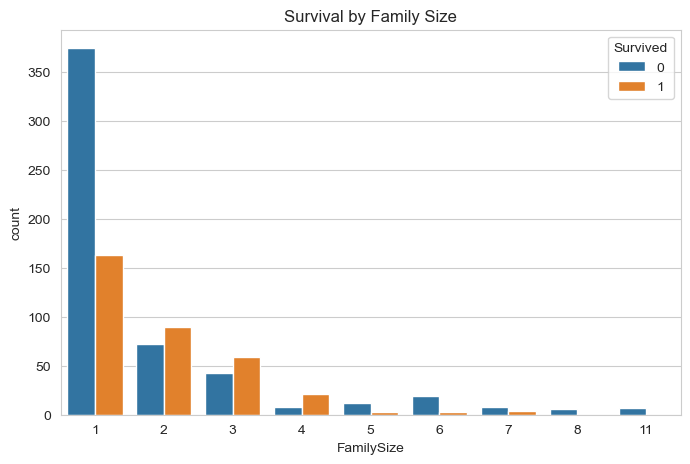

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

survival_rate = titanic['Survived'].mean() * 100
print(f"\nOverall survival rate: {survival_rate:.2f}%")


plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender (0 = Male, 1 = Female)')
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survival by Embarkation Port (0 = S, 1 = C, 2 = Q)')
plt.show()


titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Survived', data=titanic)
plt.title('Survival by Family Size')
plt.show()

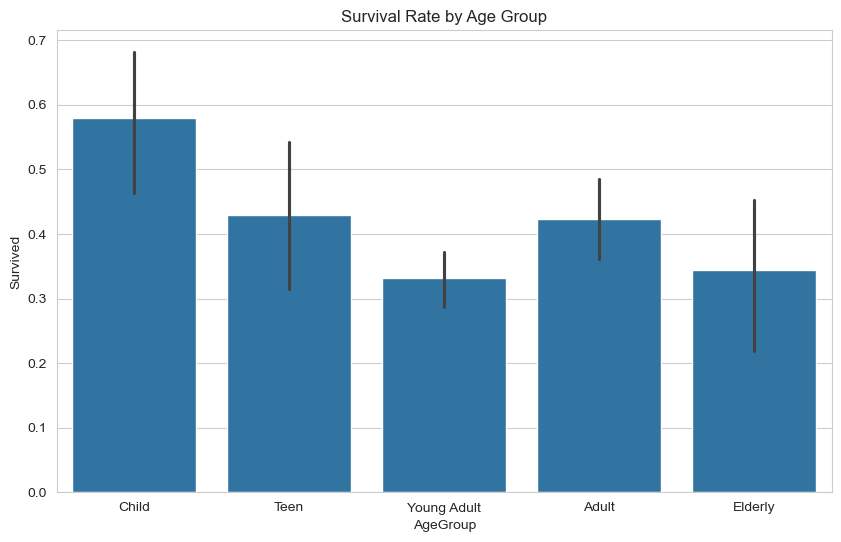

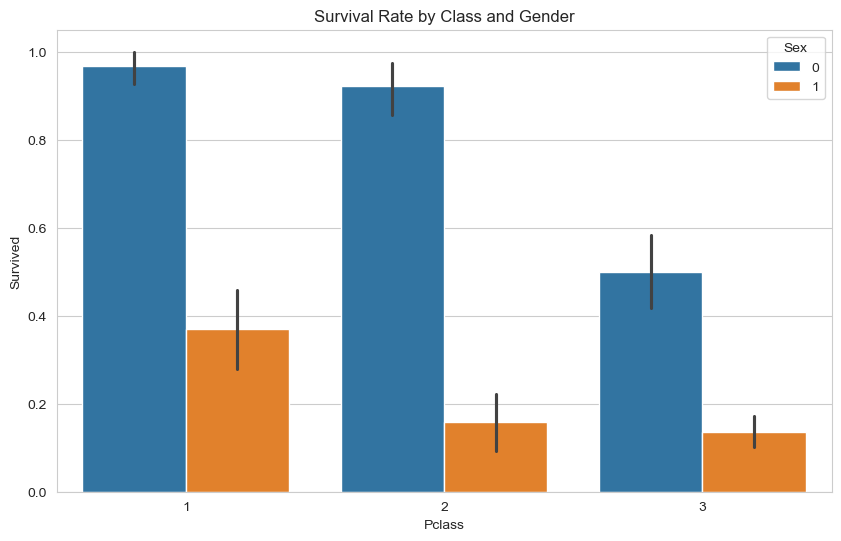

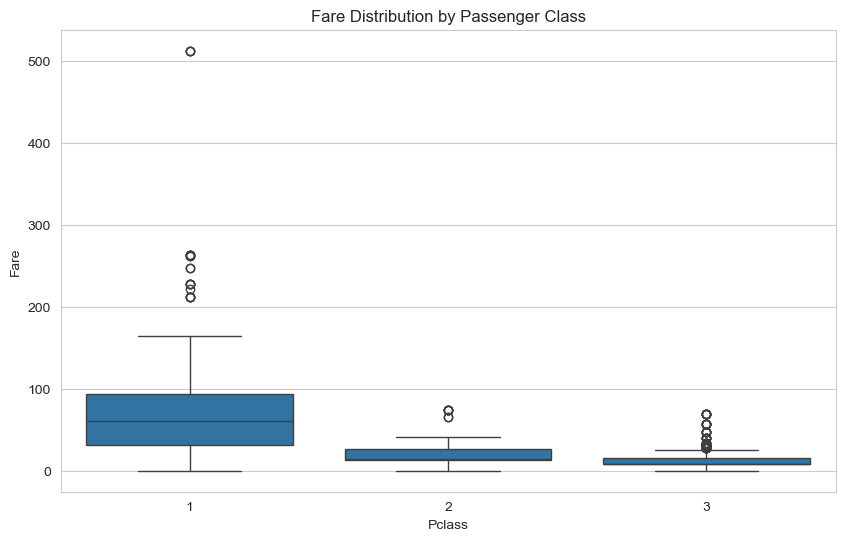

In [9]:
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 30, 50, 80], 
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly'])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Class and Gender')
plt.show()

# 3. Fare distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [11]:
print("\nKey Findings:")
print("1. Overall survival rate:", f"{titanic['Survived'].mean()*100:.2f}%")
print("2. Female survival rate:", f"{titanic[titanic['Sex']==1]['Survived'].mean()*100:.2f}%")
print("3. Male survival rate:", f"{titanic[titanic['Sex']==0]['Survived'].mean()*100:.2f}%")
print("4. Survival rate by class:")
print(titanic.groupby('Pclass')['Survived'].mean().apply(lambda x: f"{x*100:.2f}%"))
print("\nTop Correlations with Survival:")



Key Findings:
1. Overall survival rate: 38.38%
2. Female survival rate: 18.89%
3. Male survival rate: 74.20%
4. Survival rate by class:
Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

Top Correlations with Survival:
